### 1. Описание проекта

**Цель проекта** - выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

**Исходные данные:**
    Датасеты с данными о вакансиях для Аналитиков данных и Системных аналитиков полученные из API HH.ru.

**Описание полей в данных:**
* id - Уникальный идентификатор вакансии.
* name - Название вакансии.
* published_at - Дата публикации.
* alternate_url - Ссылка на вакансию.
* type - Статус вакансии на момент получения данных от api и передачи их в базу.
* employer - Работодатель.
* department - Работодатель, отдел.
* area - Регион места работы.
* experience - Требуемый опыт работы.
* key_skills - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.
* schedule - График работы.
* employment - Тип занятости.
* description - Описание вакансии.
* description_lemmatized - Лемматизированное описание вакансии.
* salary_from - Нижняя граница предлагаемой заработной платы.
* salary_to - Верхняя граница предлагаемой заработной платы.
* salary_bin - Категория зарплаты.
* key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills.
* hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.


In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [2]:
# путь к файлам данных
path_da = '/Users/new/Documents/Aналитика_hh_(da+sa)/vacancies_da (1).xlsx'
path_sa = '/Users/new/Documents/Aналитика_hh_(da+sa)/vacancies_sa.xlsx'

### 2. Чтение и предобработка данных

In [3]:
# чтение файла с данными о вакансиях для Аналитиков данных
try:
    df_da = pd.read_excel(path_da)
    display(df_da.head(7))
except:
    print('Файл не найден')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
5,100059110,Senior Data Analyst (Цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",Удаленная работа,Полная занятость,"сегодня билайн — компания изменений, чутко реа...",сегодня билайн компания изменение чутко реагир...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN
6,100060772,Аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,один из ключевых партнеров центра занятости на...,ключевой партнер центр занятость население раб...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN


In [4]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

Типы данных соответствуют данных в ячейкам. 
Данные о вакансиях "Аналитик данных" содержат 1801 запись. 

In [5]:
# проверим датасет на наличие явных дубликатов
df_da.duplicated().sum()

0

In [6]:
# явных дубликатов нет, проверим дубликаты по id
df_da.duplicated(['id']).sum()

0

выведем уникальные значения столбцов area, experience, schedule, employment чтобы проверить нет ли там дубликатов:

In [7]:
print(sorted(df_da['area'].unique()))

['Адыгейск', 'Алтайское', 'Артем', 'Байбек', 'Балашиха', 'Белгород', 'Вейделевка', 'Великие Луки', 'Вельск', 'Верхняя Пышма', 'Владивосток', 'Владимир', 'Волгоград', 'Воронеж', 'Горно-Алтайск', 'Дзержинский', 'Дмитров', 'Екатеринбург', 'Златоуст', 'Иваново (Ивановская область)', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Кемерово', 'Киров (Кировская область)', 'Королев', 'Краснодар', 'Красноярск', 'Курган', 'Липецк', 'Луховицы', 'Магнитогорск', 'Майкоп', 'Москва', 'Мытищи', 'Набережные Челны', 'Нефтекамск', 'Нижний Новгород', 'Новосибирск', 'Одинцово', 'Омск', 'Оренбург', 'Пермь', 'Подольск (Московская область)', 'Псков', 'Пушкино (Московская область)', 'Ростов-на-Дону', 'Рязань', 'Самара', 'Санкт-Петербург', 'Саратов', 'Северск (Томская область)', 'Симферополь', 'Смоленск', 'Сочи', 'Ступино', 'Тверь', 'Тольятти', 'Томск', 'Тула', 'Турочак', 'Тюмень', 'Ульяновск', 'Уфа', 'Химки', 'Чебоксары', 'Челябинск', 'Щербинка', 'Якутск']


In [8]:
print(sorted(df_da['experience'].unique()))

['Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)']


In [9]:
print(sorted(df_da['schedule'].unique()))

['Гибкий график', 'Полный день', 'Сменный график', 'Удаленная работа']


In [10]:
print(sorted(df_da['employment'].unique()))

['Полная занятость', 'Проектная работа', 'Стажировка', 'Частичная занятость']


Дубликатов в данных столбцах нет.

In [11]:
# посмотрим пропуски в процентах относительно общего объема данных
pd.DataFrame(round(df_da.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
id,0.000000
name,0.000000
published_at,0.000000
alternate_url,0.000000
type,0.000000
employer,0.000000
department,71.100000
area,0.000000
experience,0.000000
key_skills,0.000000


Большое количество пропусков есть в поле department. Посмотрим уникальные значения в заполненных строках:

In [12]:
df_da['department'].unique()

array([nan, 'X5 GROUP, Центральный офис', 'билайн: ИТ, Data, Digital',
       'Сбер для экспертов', '«МТС» ', 'Ozon Офис и Коммерция',
       'Северсталь. IT & Digital',
       'Гринатом. Многофункциональный Центр Обслуживания. Закупки и логистика',
       'Яндекс.Маркет', 'Сбер. IT', 'ГК Иннотех | Финтех (Иннотех)',
       'Яндекс', 'ГК Иннотех | Интеграция Консалтинг', 'VK',
       'Сбер. Data Science', 'ПАО «Промсвязьбанк», ИТ',
       'ПАО «Газпром нефть» ИТ', 'ПАО ВТБ, Технологический блок',
       'Группа компаний «Group4Media», Управляющая компания',
       '«МТС» Кибербезопасность', 'Леруа Мерлен. Центральный офис', 'ИТ',
       'ГК Иннотех | Большие данные', 'ВкусВилл. Офис', 'Rambler&Co',
       'Триколор Вещание и бэк-офис', 'Газпромбанк', 'Ozon Fintech',
       'Лента, федеральная розничная сеть, IT ',
       'Компания «СПОРТМАСТЕР», Sportmaster Lab', '«МТС» КИОН',
       'Московский Кредитный Банк. Профессионалы',
       'ПАО ВТБ, Подразделения Поддержки и Контроля',
     

Видим, что это поле в основном заполненено у крупных компаний, у которых можно выделить отдельные направления внутри компании. Заполнять пропуски у остальных компаний не имеет смысла. 

Нижняя граница зарплаты не указана для 80,7% вакансий, верхняя для 87,3%. Эти пропуски можно заполнить средней зарплатой в зависимости от грейда и города, так как зарплата в крупных городах (Москва, Санкт-Петербург) как правило выше. Но для поставленной задачи это не имеет смысл, так как заполнение пропусков средними значениями не повляет на выводе о средней зарплате специалиста.

Много пропусков в столбцах с хард и софт скиллами. Но в столбце key_skills пропуски отсутствуют, значит можно преобразовать строку в список скиллов и при анализе требуемых софт и хард скиллов посмотреть статистику наиболее часто встречающихся и руками приплюсовать их к тем куда они больше подходят. 

In [13]:
# функция для преобразования строки с кейскилз в список 
def key_skills_to_list(key_skills):
    return [x.strip() for x in key_skills.lstrip('[').rstrip(']').replace('\'', '').split(',')]

In [14]:
df_da['key_skills'] = df_da['key_skills'].apply(key_skills_to_list)

# проверим что столбец key_skills теперь выглядит как список скиллов:
df_da['key_skills']

0                           [Power BI, СУБД, Python, SQL]
1              [MS SQL, Работа с базами данных, MS Excel]
2         [SQL, Power BI, СУБД, Python, Clickhouse, BPMN]
3       [Анализ данных, Коммуникация, SQL, MS Office, ...
4                                          [Документация]
                              ...                        
1796    [Проактивность, Коммуникация, SQL, ad-hoc, A/B...
1797    [Грамотная речь, Сводные таблицы, Сбор и анали...
1798    [Анализ данных, SQL, MS Power BI, Python, Data...
1799    [Анализ данных, SQL, MS Power BI, Python, Data...
1800    [Анализ данных, SQL, MS Power BI, Python, Data...
Name: key_skills, Length: 1801, dtype: object

In [15]:
# чтение файла с данными о вакансиях для Системных аналитиков
try:
    df_sa = pd.read_excel(path_sa)
    display(df_sa.head())
except:
    print('Файл не найден')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [16]:
df_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

Типы данных соответствуют данных в ячейкам. 
Данные о вакансиях "Системный аналитик" содержат 1915 запись. 

In [17]:
# проверим датасет на наличие явных дубликатов
df_sa.duplicated().sum()

0

In [18]:
# явных дубликатов нет, проверим дубликаты по id
df_sa.duplicated(['id']).sum()

0

In [19]:
# проверим нет ли вакансий, которые отнесли одновременно к двум датасетам:
df_duplicated = pd.merge(df_da, df_sa, how='inner', on=['id'])
display(df_duplicated)

,id,name_x,published_at_x,alternate_url_x,type_x,employer_x,department_x,area_x,experience_x,key_skills_x,...,schedule_y,employment_y,description_y,description_lemmatized_y,salary_from_y,salary_to_y,salary_bin_y,key_skills_from_key_skills_field_y,hard_skills_from_description_y,soft_skills_from_description_y
0,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"[SQL, API, Python, Документация, confluence, E...",...,Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация
1,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"[confluence, Документация]",...,Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация
2,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"[confluence, Документация]",...,Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация
3,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"[Teradata, SQL, Документация, Greenplum, Hadoo...",...,Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
4,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-06-11 09:57:39,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"[MS SQL, Системный анализ, DWH]",...,Полный день,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN


In [20]:
# по описанию вакансий по ссылкам эти вакансии ближе к системным аналитикам, поэтому вакансии со следующими id :
ids = df_duplicated['id']
# удалим из датасета вакансий Аналитик данных
df_da = df_da.query('id not in @ids')
# проверим что не удалилось ничего лишнего
df_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1796 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1796 non-null   int64         
 1   name                              1796 non-null   object        
 2   published_at                      1796 non-null   datetime64[ns]
 3   alternate_url                     1796 non-null   object        
 4   type                              1796 non-null   object        
 5   employer                          1796 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1796 non-null   object        
 8   experience                        1796 non-null   object        
 9   key_skills                        1796 non-null   object        
 10  schedule                          1796 non-null   obj

In [21]:
# посмотрим пропуски в датасете вакансий Системного аналитика в процентах относительно общего объема данных
pd.DataFrame(round(df_sa.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
id,0.000000
name,0.000000
published_at,0.000000
alternate_url,0.000000
type,0.000000
employer,0.000000
department,81.100000
area,0.000000
experience,0.000000
key_skills,0.000000


Здесь все аналогично таблице с вакансиями для Аналитиков данных. Оставим пропуски  в колонках с подразделением, зарплатой и хард/ софт скиллами, а колонку key_skills преобразуем в список чтобы было удобнее использовать для дальнейшего анализа.

In [22]:
df_sa['key_skills'] = df_sa['key_skills'].apply(key_skills_to_list)
# проверим что столбец key_skills теперь выглядит как список скиллов
df_sa['key_skills']

0          [1С, Аналитический склад ума, confluence, SQL]
1       [Разработка технических заданий, Бизнес-анализ...
2                                          [Документация]
3       [ERP, Atlassian Jira, 1С: Управление Производс...
4         [JSON, SQL, XML, SOAP, HTML, JS, Java, CSS, C#]
                              ...                        
1910                         [Документация, Коммуникация]
1911    [IDEF, Разработка технических заданий, REST, Б...
1912                                                   []
1913    [SOA, XML, Atlassian Jira, Use cases, DB2, BPM...
1914    [Документация, 1С: Предприятие, 1С: Бит Финанс...
Name: key_skills, Length: 1915, dtype: object

### 3. Анализ грейдов требуемых специалистов

In [23]:
# выведем уникальные значения столбца с требуемым опытом работы для Аналитиков данных
df_da['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

Можно выделить 4 грейда Аналитиков данных:
* Junior - без опыта работы;
* Junior+ - опыт работы от 1 до 3 лет;
* Middle - опыт работы 3-6 лет;
* Senior - опыт работы более 6 лет.

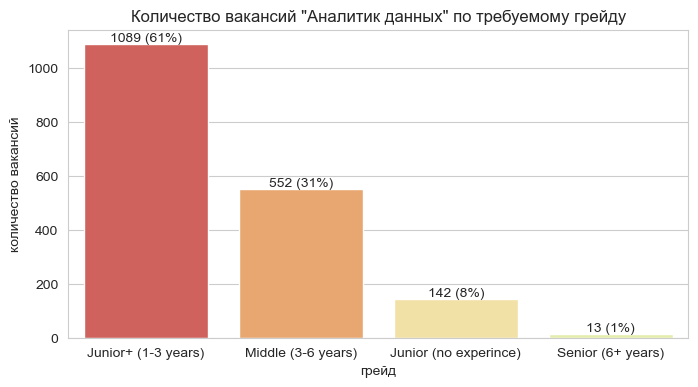

In [24]:
# построим диаграмму количества вакансий в зависимости от опыта работы требуемого специалиста
plt.figure(figsize=(8, 4))
sns.set_style('whitegrid') 
sns.set_palette('Spectral') 
ax = sns.countplot(data=df_da, 
              x='experience', 
              order = df_da['experience'].value_counts().index)
plt.title('Количество вакансий "Аналитик данных" по требуемому грейду')
plt.xlabel('грейд')
plt.ylabel('количество вакансий')
abs_values = df_da['experience'].value_counts(ascending=False)
rel_values = df_da['experience'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()

Больше половины всех вакансий - это вакансии для специалистов с небольшим опытом работы (Junior+). Меньше всего вакансий для разработчиков с большим опытом (Senior) - всего 1% от общего количества вакансий.

In [25]:
# выведем уникальные значения столбца с требуемым опытом работы для Системных аналитиков:
df_sa['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

Разделения на грейды и требуемый стаж аналогичен вакансиям Аналитика данных. Построим диаграмму количества вакансий в зависимости от опыта работы требуемого специалиста:

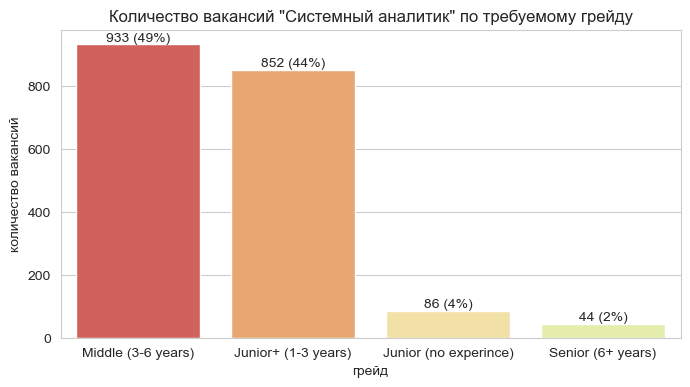

In [26]:
plt.figure(figsize=(8, 4))
sns.set_style('whitegrid') 
sns.set_palette('Spectral') 
ax = sns.countplot(data=df_sa, 
              x='experience', 
              order = df_sa['experience'].value_counts().index)
plt.title('Количество вакансий "Системный аналитик" по требуемому грейду')
plt.xlabel('грейд')
plt.ylabel('количество вакансий')
abs_values = df_sa['experience'].value_counts(ascending=False)
rel_values = df_sa['experience'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()

Почти половина вакансий для специалистов с опытом работы 3-6 лет. На втором месте Junior+ специалисты - 44% от общего количества вакансий. Меньше всего требуется специалистов без опыта (4%) и специалисты с большим опытом (2%). 

**Выводы:** у Аналитиков данных наиболее востребованы Junior+ специалисты с опытом работы 1-3 года, в то время как Системных аналитиков чаще ищут с бОльшим опытом работы - Middle специалисты со стажем 3-6 лет. Senior специалистов, а также кандидатов без опыта работы ищут реже остальных и среди Аналитиков данных, и среди Системных аналитиков.

### 4. Определение типичного места работы для Аналитика данных и Системного аналитика 

#### 4.1 Исследование ТОП-работодателей

##### ТОП-работадатели для Аналитика данных

In [27]:
# выведем список ТОП-10 уникальных работодателей для Аналитиков данных
top10_da = df_da.groupby(by='employer')['employer'].count().sort_values(ascending=False).head(10)
display(top10_da)

employer
СБЕР                                     243
WILDBERRIES                               43
Ozon                                      34
Банк ВТБ (ПАО)                            28
Т1                                        26
МАГНИТ, Розничная сеть                    24
МТС                                       22
Okko                                      19
Центральный банк Российской Федерации     16
Яндекс                                    15
Name: employer, dtype: int64

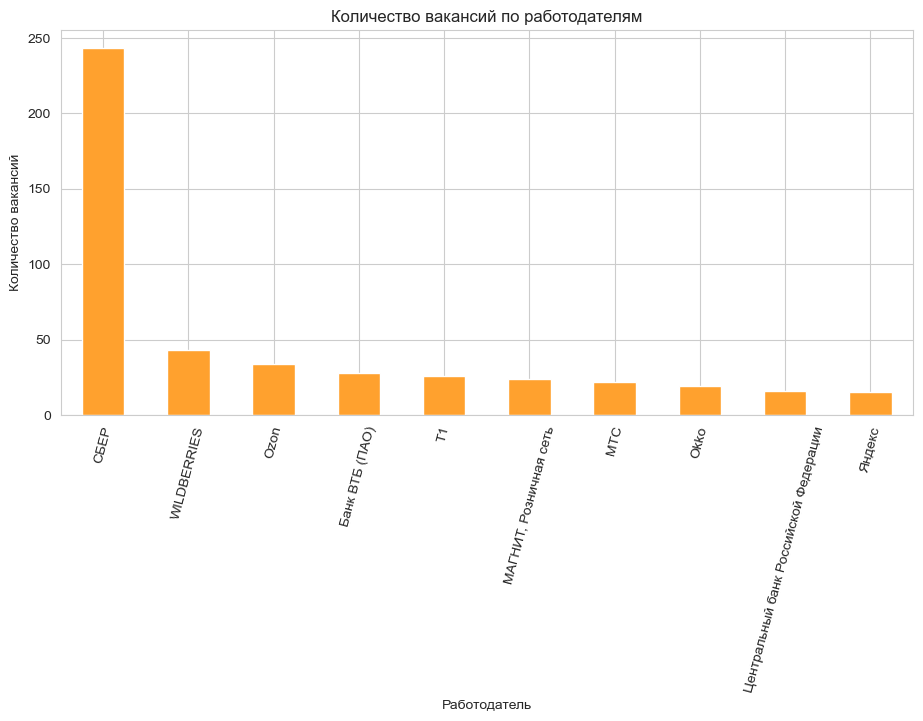

In [28]:
top10_da.plot(kind='bar', color='#ffa12e', figsize=(11,5))
plt.title('Количество вакансий по работодателям')
plt.xlabel('Работодатель')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=75)
plt.show()

Больше всего вакансий у Сбера - 243. Все остальные работодатели отстают с большим отрывом. Так у Wildberries занявшего второе место всего 43 вакансии. 

Среди работодателей компании разных направлений - АйТи, магазины, банки, сотовая связь и онлайн-кинотеатр.

Найдем ТОП-10 работодателей для каждого грейда (Junior, Junior+, Middle, Senior). Для удобства и чтобы избежать дублирования кода напишем функции, которые будут искать топ-10 работодателей для заданного грейда и выводить диаграмму. 

In [29]:
# функция поиска топ-10 работодателей для заданного грейда
def top10_da_grade(df, grade):
    return (
           df.query('experience == @grade')
             .groupby(by='employer')['employer']
             .count()
             .sort_values(ascending=False)
             .head(10)
    )

In [30]:
# функция вывода столбчатой диаграммы по топ-10 работодателям
def top10_chart(df, grade):
    df.plot(kind='bar', color='#ffa12e', figsize=(11,5))
    plt.title(f'Количество вакансий по работодателям для грейда {grade}')
    plt.xlabel('Работодатель')
    plt.ylabel('Количество вакансий')
    plt.xticks(rotation=75)
    plt.show()

In [31]:
# Топ работодателей для грейда Junior
top10_da_junior = top10_da_grade(df_da, "Junior (no experince)")
display(top10_da_junior)

employer
СБЕР                                    13
МАГНИТ, Розничная сеть                   7
DNS Технологии                           4
Согласие, страховая компания             4
ANCOR                                    3
Юникон АП                                3
Группа страховых компаний Югория         2
Ростелеком - Центры обработки данных     2
Between Exchange                         2
Газпромбанк                              2
Name: employer, dtype: int64

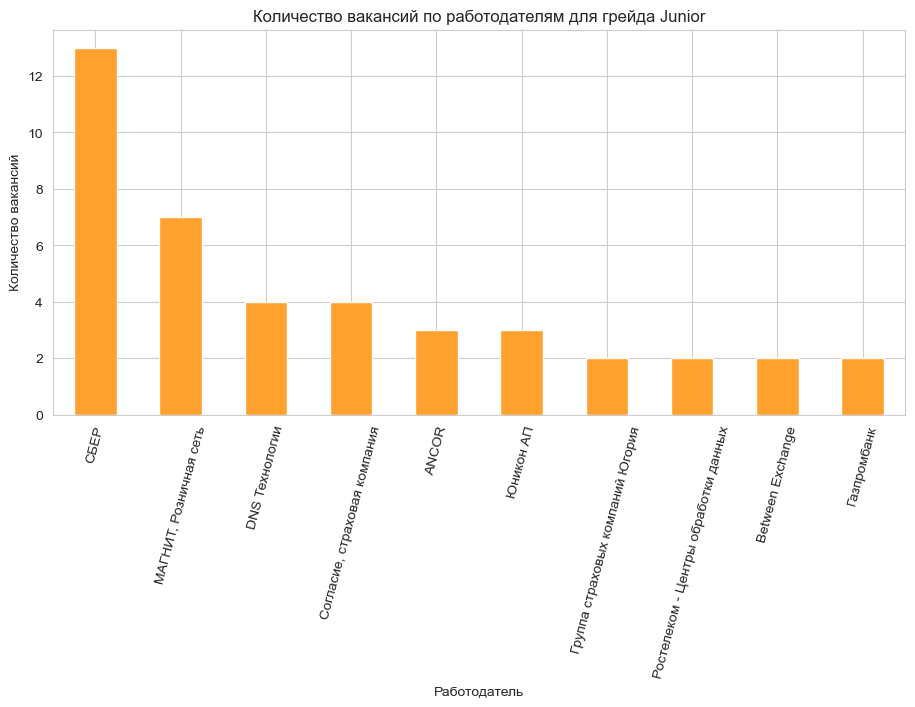

In [32]:
top10_chart(top10_da_junior, 'Junior')

Среди топ работодателей для грейда Junior на первом месте по количеству вакансий СБЕР, что в целом ожидаемо так как у него большое число вакансий для аналитиков данных. На втором месте Магнит, у которого 7 вакансий из 24, то есть почти 30% вакансий, для специалистов без опыта. По 4 вакансии у DNS и СК Согласие, по 3 у КА Ancor и Юникон АП. У остальных компаний 2 и меньше вакансии для Junior специалистов.

In [33]:
# Топ работодателей для грейда Junior+
top10_da_junior_plus = top10_da_grade(df_da, 'Junior+ (1-3 years)')
display(top10_da_junior_plus)

employer
СБЕР                                           159
Банк ВТБ (ПАО)                                  24
Ozon                                            17
WILDBERRIES                                     16
МАГНИТ, Розничная сеть                          15
МТС                                             15
Okko                                            12
Ростелеком                                      12
Центральный банк Российской Федерации           12
ГКУ Центр занятости населения города Москвы     11
Name: employer, dtype: int64

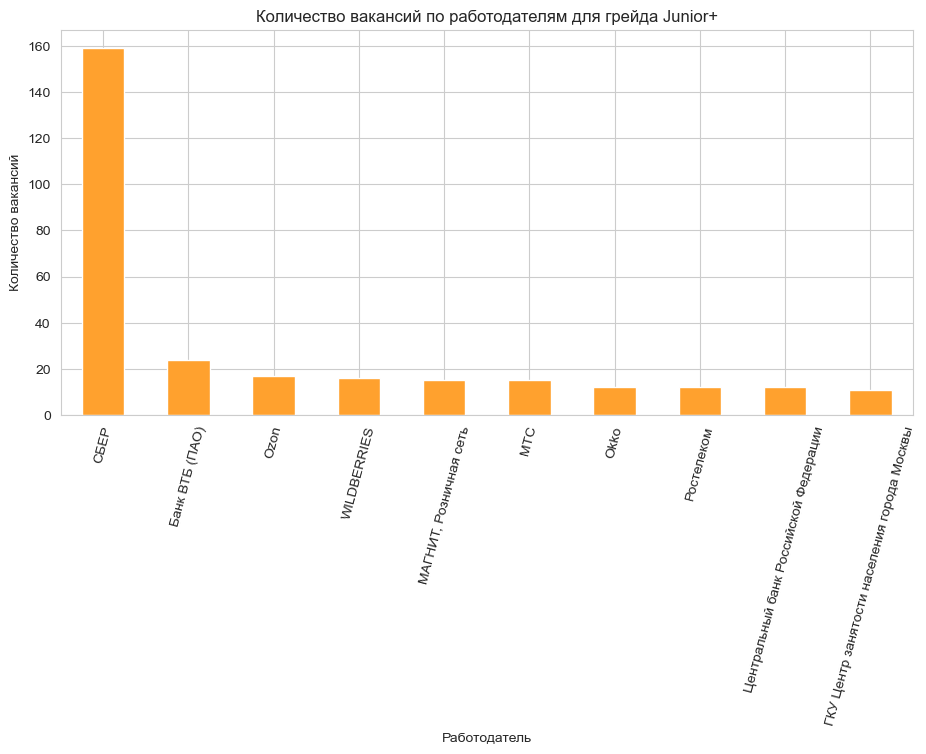

In [34]:
top10_chart(top10_da_junior_plus, 'Junior+')

Наибольшее количество вакансий для грейда Junior+ у Сбера - 159 вакансий. Это больше половины от общего количества вакансий Сбера. Остальные работодатели топ10 для Junior+ практически аналогичны списку топ10 для Аналитиков данных без разбивки по грейдам. 

In [35]:
# Топ работодателей для грейда Middle
top10_da_middle = top10_da_grade(df_da, 'Middle (3-6 years)')
display(top10_da_middle)

employer
СБЕР                    71
WILDBERRIES             26
Т1                      21
Ozon                    15
Яндекс                  14
INGURU.RU                9
Maxim technology         8
USETECH                  8
«UZUM TECHNOLOGIES».     7
Okko                     7
Name: employer, dtype: int64

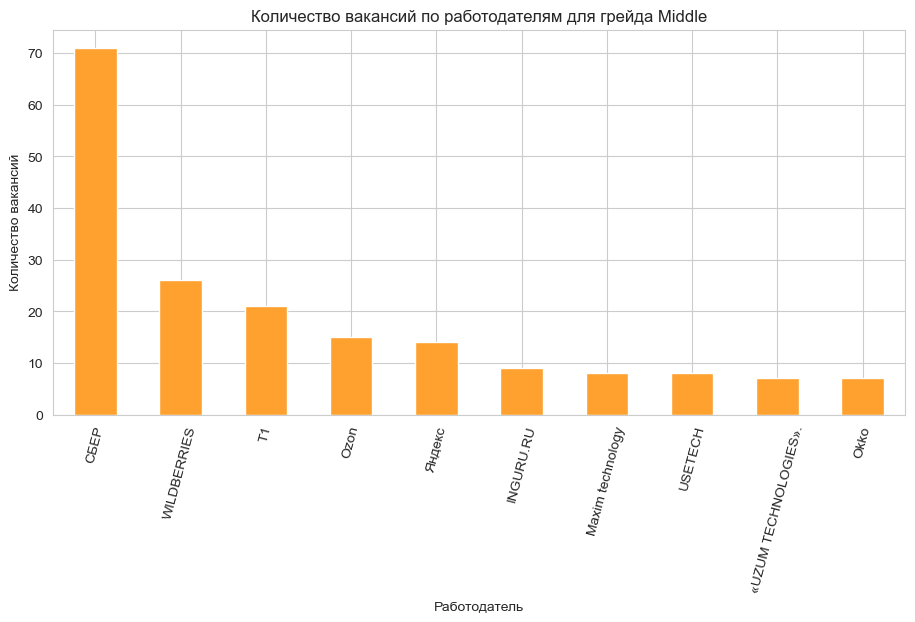

In [36]:
top10_chart(top10_da_middle, 'Middle')

Больше всего вакансий для Middle специалистов от Сбера. Далее идут wildberries, T1, Ozon и Яндекс. В основном в списке топ работодателей крупные компании связанные с АйТи.

In [37]:
# Топ работодателей для грейда Senior
top10_da_senior = top10_da_grade(df_da, 'Senior (6+ years)')
display(top10_da_senior)

employer
Леруа Мерлен          4
Reinvent Baltics      2
Aramco Innovations    1
B2Broker              1
CloudPayments         1
PayMatrix             1
Spice Agency          1
Мединвестгрупп        1
Секонд Сайт           1
Name: employer, dtype: int64

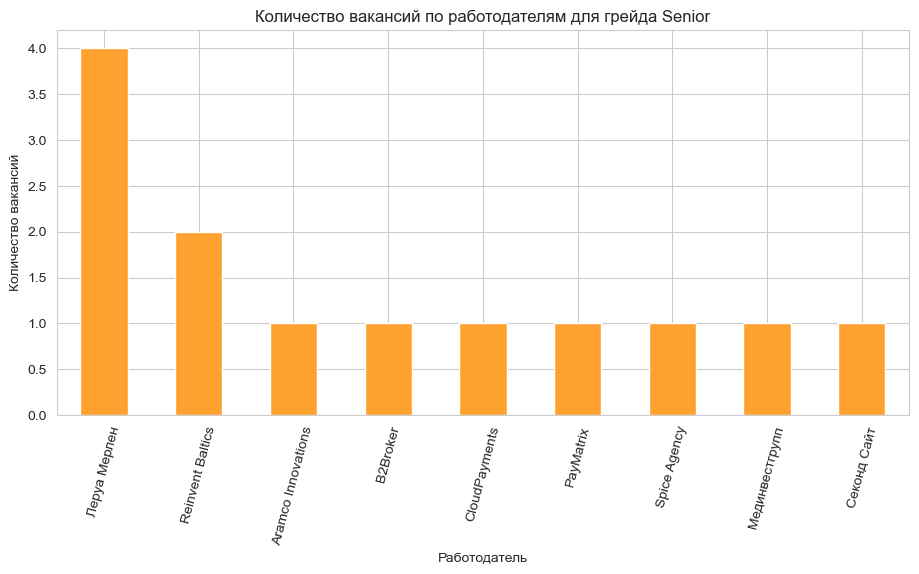

In [38]:
top10_chart(top10_da_senior, 'Senior')

По работодателям для Senior специалистов сложно сделать какие-то выводы, так как данных очень мало. Максимальное количество вакансий - 4 - от компании Леруа Мерлен. У остальных компаний 2 и меньше вакансий. Общего у этих работодателей то, что большинство из них достаточно крупные, некоторые международные.

##### ТОП-работадатели для Системного аналитика

In [39]:
# выведем список ТОП-10 уникальных работодателей для Системных аналитиков
top10_sa = df_sa.groupby(by='employer')['employer'].count().sort_values(ascending=False).head(10)
display(top10_sa)

employer
СБЕР                                    95
Т1                                      80
Aston                                   65
Совкомбанк Технологии                   37
ПСБ (ПАО «Промсвязьбанк»)               30
Selecty                                 22
Т-Банк                                  22
Ростелеком Информационные Технологии    18
билайн                                  18
Красное & Белое, розничная сеть         16
Name: employer, dtype: int64

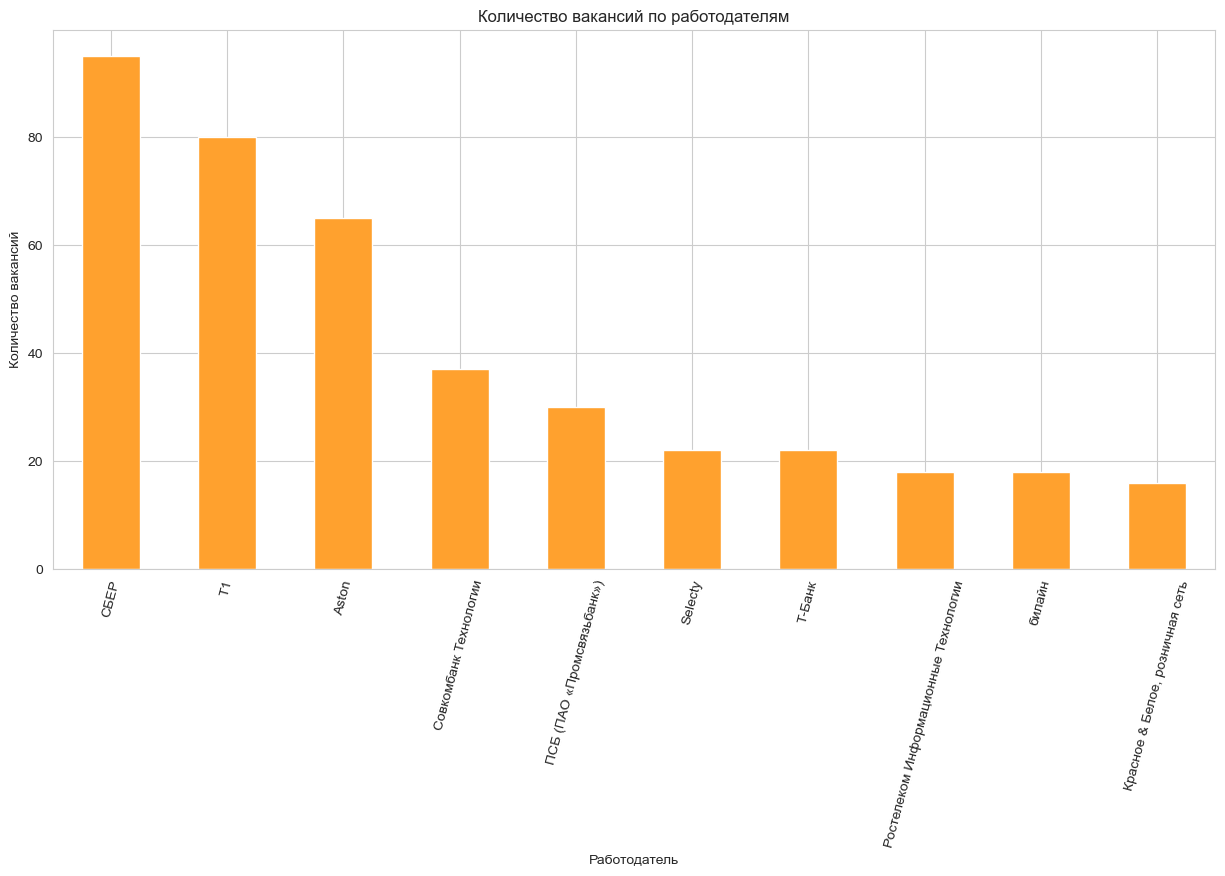

In [40]:
top10_sa.plot(kind='bar', color='#ffa12e', figsize=(15,7))
plt.title('Количество вакансий по работодателям')
plt.xlabel('Работодатель')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=75)
plt.show()

Аналогично вакансиям для Аналитиков данных, больше всего вакансий для Системных аналитиков от Сбера. Но если у Аналитиков данных вакансий от сбера в 6 раз больше чем от компании на втором месте по числу вакансий, то здесь разница в количестве вакансий у сбера и компаний на 2 и 3 местах не такая большая. Также видно, что среди работодателей больше АйТи компаний.

Найдем ТОП-10 работодателей для каждого грейда (Junior, Junior+, Middle, Senior). Для этого воспользуемся функциями которые использовали для работы с датасетом с вакансиями Аналитик данных. 

In [41]:
# Топ работодателей для грейда Junior
top10_sa_junior = top10_da_grade(df_sa, "Junior (no experince)")
display(top10_sa_junior)

employer
Aston                             16
Компания Апогей (1С-франчайзи)     8
TWIGA Communication Group          5
Дунайс                             4
Т1                                 3
Ред Софт                           3
Центр финансовых технологий        3
IBS                                2
Спектр                             2
СБЕР                               2
Name: employer, dtype: int64

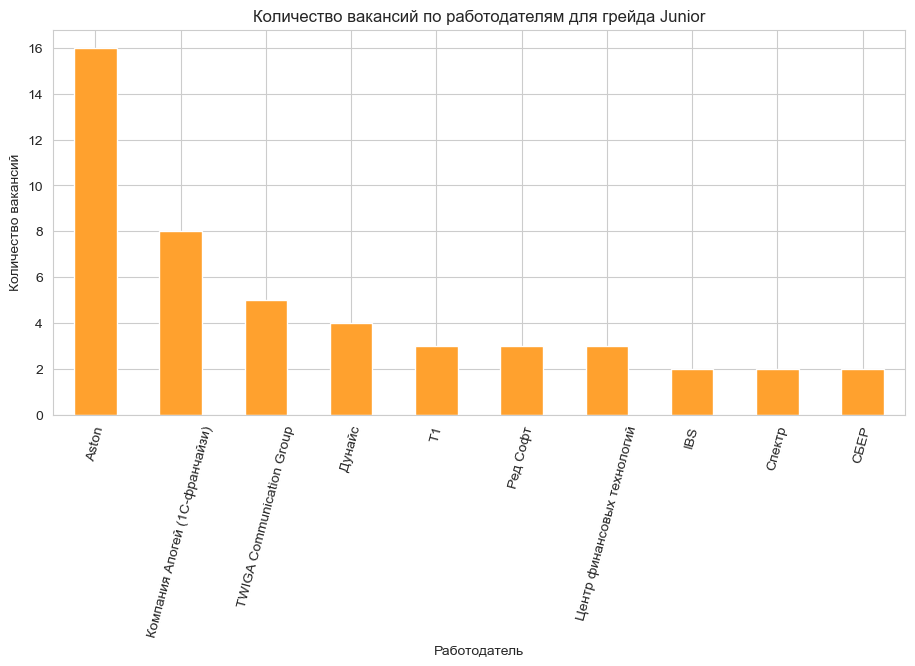

In [42]:
top10_chart(top10_sa_junior, 'Junior')

Для грейда Junior больше всего вакансий у компании Aston - крупной Российской АйТи компании. Далее идут Компания Апогей (1С-франчайзи) - 8 вакансий и TWIGA Communication Group - 5 вакансий. А от лидера по общему числу вакансий Сбера всего 2 вакансии для специалистов без опыта. 

In [43]:
# Топ работодателей для грейда Junior+
top10_sa_junior_plus = top10_da_grade(df_sa, 'Junior+ (1-3 years)')
display(top10_sa_junior_plus)

employer
СБЕР                                    42
Aston                                   25
Совкомбанк Технологии                   22
Т1                                      17
Красное & Белое, розничная сеть         16
Selecty                                 13
Ростелеком Информационные Технологии    10
Лига Цифровой Экономики                  9
ПСБ (ПАО «Промсвязьбанк»)                9
VILAVI                                   8
Name: employer, dtype: int64

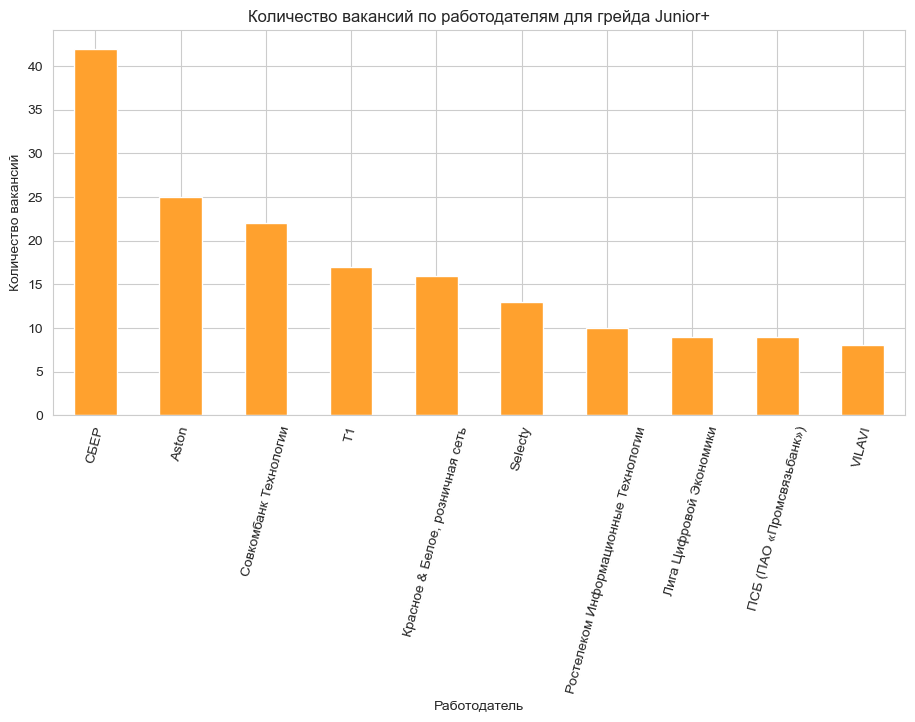

In [44]:
top10_chart(top10_sa_junior_plus, 'Junior+')

Лидером по числу вакансий для грейда Junior+ стал сбер. Среди всех его вакансий половина для специалистов со стажем 1-3 года. Среди топ работодателей много IT-компаний. 

In [45]:
# Топ работодателей для грейда Middle
top10_sa_middle = top10_da_grade(df_sa, 'Middle (3-6 years)')
display(top10_sa_middle)

employer
Т1                                       57
СБЕР                                     51
Aston                                    23
ПСБ (ПАО «Промсвязьбанк»)                21
Т-Банк                                   19
Прикладные технологии                    16
Совкомбанк Технологии                    15
билайн                                   14
Центральный банк Российской Федерации    10
МТС                                       9
Name: employer, dtype: int64

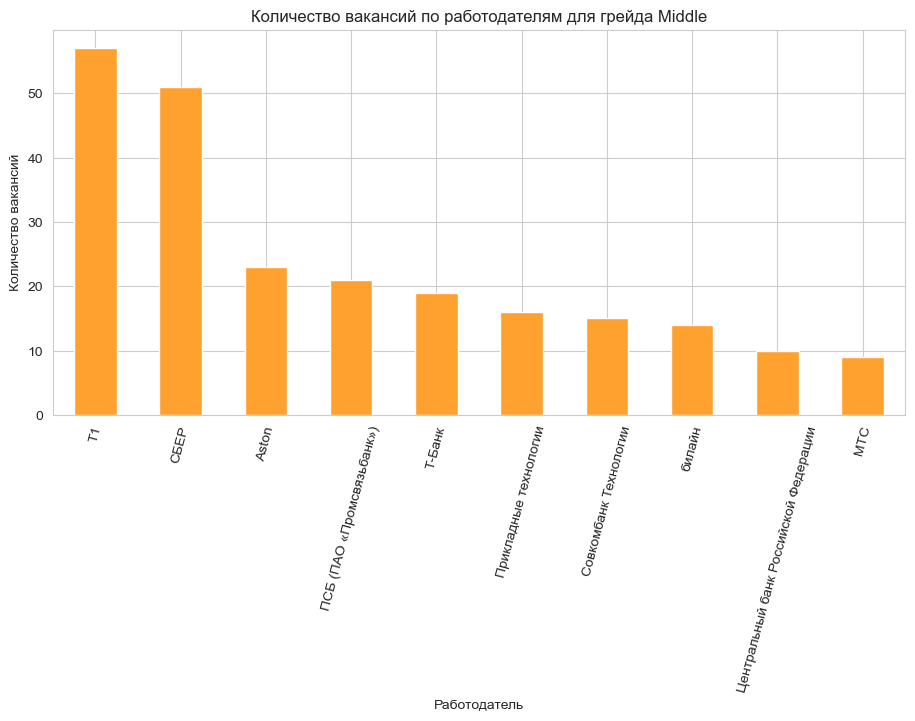

In [46]:
top10_chart(top10_sa_middle, 'Middle')

В данных о вакансиях для Middle специалистов уже больше АйТи компаний. И лидером по числу вакансий в данном сегменте является не сбер, а Т1 - крупная IT компания. 

In [47]:
# Топ работодателей для грейда Senior
top10_sa_senior = top10_da_grade(df_sa, 'Senior (6+ years)')
display(top10_sa_senior)

employer
Т1                                                 3
Яндекс                                             2
БФТ-Холдинг (Бюджетные и Финансовые Технологии)    2
Mediascope                                         2
ТестОпс                                            2
Платформа                                          1
Группа компаний Астра                              1
ДевТулз                                            1
Кловер Групп                                       1
Миксвел                                            1
Name: employer, dtype: int64

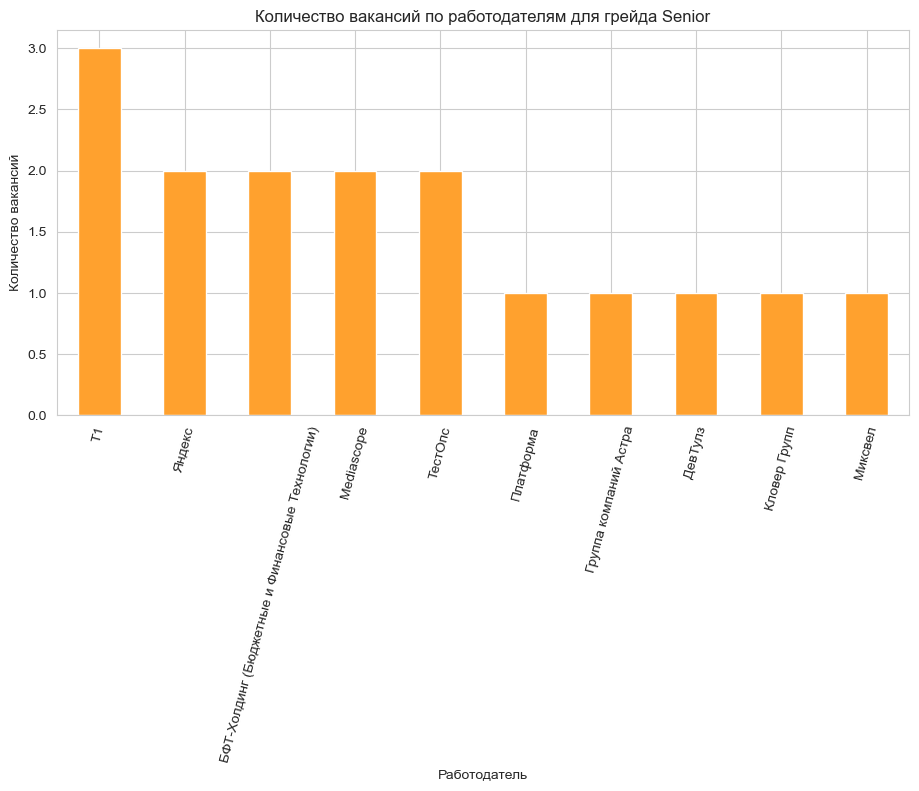

In [48]:
top10_chart(top10_sa_senior, 'Senior')

Senior специалистов ищут в основном крупные IT компании, в том числе Т1 или Яндекс. Но в целом в данном сегменте сложно сделать выводы из-за небольшого количества данных.

#### 4.2 Исследование зарплаты

##### Уровни зарплат для Аналитика данных

In [49]:
# посчитаем медианные уровни нижней и верхней границы зарплаты в зависимости от грейда:
df_da_salary_all = df_da.pivot_table(index='experience', values=['salary_from', 'salary_to'], aggfunc='median')
df_da_salary_all

,salary_from,salary_to
experience,,
Junior (no experince),60000.0,80000.0
Junior+ (1-3 years),90000.0,120000.0
Middle (3-6 years),150000.0,234000.0
Senior (6+ years),200000.0,240000.0


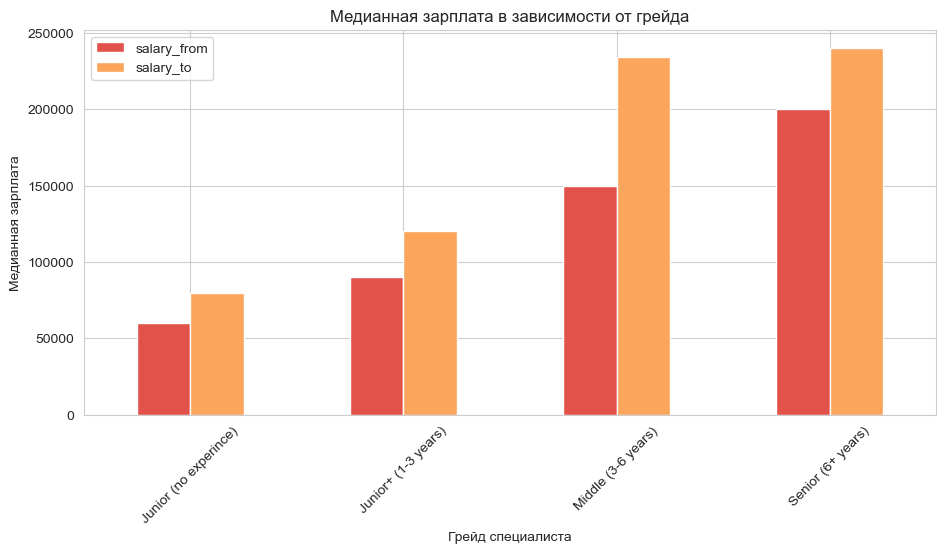

In [50]:
# визуализируем полученные данные 
df_da_salary_all.plot(kind='bar', figsize=(11,5))
plt.title('Медианная зарплата в зависимости от грейда')
plt.xlabel('Грейд специалиста')
plt.ylabel('Медианная зарплата')
plt.xticks(rotation=45)
plt.show()

Уровни зарплат могут отличаться для крупных городов (Москва, Санкт-Петербург) и небольших. Поэтому добавим новый столбец в котором все города кроме Москвы и Питера попадут в категорию Другой город.

In [51]:
df_da['area_scope'] = np.where(df_da['area'] == 'Москва', 'Москва',
                         np.where(df_da['area'] == 'Санкт-Петербург', 'Санкт-Петербург', 'Другой город'))

In [52]:
df_da_salary = (
    df_da.pivot_table(index='experience', values=['salary_from', 'salary_to'], columns='area_scope', aggfunc='median')
         .sort_index(axis='columns', level='area_scope')
)
df_da_salary

,salary_from,salary_to,salary_from,salary_to,salary_from,salary_to
area_scope,Другой город,Другой город,Москва,Москва,Санкт-Петербург,Санкт-Петербург
experience,,,,,,
Junior (no experince),60000.0,80000.0,70000.0,78045.0,75000.0,50000.0
Junior+ (1-3 years),70000.0,100000.0,100000.0,140000.0,108000.0,128000.0
Middle (3-6 years),150000.0,225000.0,150000.0,280000.0,155000.0,142500.0
Senior (6+ years),NaN,NaN,200000.0,240000.0,NaN,NaN


In [53]:
# посмотрим почему нет данных по зарплате Senior специалистов не в Москве:
df_da.query('experience == "Senior (6+ years)" and area != "Москва"')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,area_scope


Для Senior специалистов не в Москве нет вакансий. 

В Санкт-Петербурге сложилась ситуация, когда у специалистов грэйдов Junior и Middle нижняя планка зарплаты выше верхней. Вероятно при более низких уровнях зарплат работодатели сразу пишут верхнюю планку в то время как компании которые готовы платить больше не ограничивают верхний предел и готовы увеличить зарплату понравившемуся кандидату. Выведем записи чтобы проверить эту гипотезу:

In [54]:
(
    df_da.query('area=="Санкт-Петербург" and experience=="Junior (no experince)" and (salary_from.notnull() or salary_to.notnull())')
    [['id', 'name', 'employment', 'area', 'experience', 'salary_from', 'salary_to', 'salary_bin']]
)

,id,name,employment,area,experience,salary_from,salary_to,salary_bin
105,100582516,Младший аналитик данных,Полная занятость,Санкт-Петербург,Junior (no experince),30000.0,40000.0,Меньше 100 тысяч
693,94947954,Аналитик данных,Полная занятость,Санкт-Петербург,Junior (no experince),78000.0,NaN,ЗП не указана
922,95966085,Инженер отдела медико-статистической информаци...,Полная занятость,Санкт-Петербург,Junior (no experince),63000.0,NaN,ЗП не указана
972,96140242,Аналитик данных начинающий,Полная занятость,Санкт-Петербург,Junior (no experince),80000.0,NaN,ЗП не указана
1088,96737251,Аналитик данных,Полная занятость,Санкт-Петербург,Junior (no experince),75000.0,NaN,ЗП не указана
1249,97430558,Стажер Аналитик данных (Группа аналитики данных),Стажировка,Санкт-Петербург,Junior (no experince),NaN,50000.0,Меньше 100 тысяч
1318,97731172,Аналитик данных,Полная занятость,Санкт-Петербург,Junior (no experince),60000.0,NaN,ЗП не указана
1551,98767743,Аналитик данных,Полная занятость,Санкт-Петербург,Junior (no experince),75000.0,NaN,ЗП не указана
1587,98869956,Junior Data Analyst,Проектная работа,Санкт-Петербург,Junior (no experince),112200.0,NaN,ЗП не указана
1774,99862925,Аналитик данных (Специалист C&B),Полная занятость,Санкт-Петербург,Junior (no experince),80000.0,80000.0,Меньше 100 тысяч


В первом случае это единичный случай зарплаты ниже рынка который можно считать выбросом и не учитывать при оценке верхней планки зарплаты, во втором оплачиваемая стажировка, которая тоже не является полноценной занятостью. Поэтому для оценки зарплат будем использовать только нижнюю планку тем более что у специалистов без опыта верхняя скорее всего не будет сильно отличаться.

In [55]:
# Аналогично выведем вакансии для Middle специалистов
(
    df_da.query('area=="Санкт-Петербург" and experience=="Middle (3-6 years)" and (salary_from.notnull() or salary_to.notnull())')
    [['id', 'name', 'employment', 'area', 'experience', 'salary_from', 'salary_to', 'salary_bin']]
)

,id,name,employment,area,experience,salary_from,salary_to,salary_bin
28,100248730,Data analyst,Полная занятость,Санкт-Петербург,Middle (3-6 years),NaN,140000.0,От 100 тысяч до 200 тысяч
126,100682095,Аналитик данных/Data analyst,Полная занятость,Санкт-Петербург,Middle (3-6 years),NaN,110000.0,От 100 тысяч до 200 тысяч
297,101523362,Data analyst (автор курсов),Частичная занятость,Санкт-Петербург,Middle (3-6 years),120000.0,145000.0,От 100 тысяч до 200 тысяч
399,91683411,Аналитик данных с отличным знанием Excel,Полная занятость,Санкт-Петербург,Middle (3-6 years),55000.0,55000.0,Меньше 100 тысяч
483,93342654,Аналитик данных / Аналитик DWH,Полная занятость,Санкт-Петербург,Middle (3-6 years),200000.0,300000.0,Больше 300 тысяч
547,94023461,Аналитик данных (BI),Полная занятость,Санкт-Петербург,Middle (3-6 years),130000.0,NaN,ЗП не указана
580,94320918,Аналитик данных (IT),Полная занятость,Санкт-Петербург,Middle (3-6 years),120000.0,NaN,ЗП не указана
589,94344003,Аналитик данных,Полная занятость,Санкт-Петербург,Middle (3-6 years),120000.0,140000.0,От 100 тысяч до 200 тысяч
697,94969972,Data analyst (RTB),Полная занятость,Санкт-Петербург,Middle (3-6 years),180000.0,NaN,ЗП не указана
1122,96998201,Аналитик данных,Полная занятость,Санкт-Петербург,Middle (3-6 years),180000.0,NaN,ЗП не указана


Относительно небольшое количество данных, а также то что часть компаний с выской нижней планкой зарплаты не ууказали верхнюю привело к тому что медианная верхняя планка ниже медианной нижней. 

In [56]:
# посмотрим можно ли ориентироваться на колонку Категория зарплаты для оценки средней зарплаты:
df_da.query('area=="Санкт-Петербург" and salary_bin != "ЗП не указана"')['id'].count()

25

Всего 25 записей с казанием интервала зарплат, это слишком мало данных для оценки статистики по зарплате.

**Выводы:** 
* в Москве и Санкт-Петербурге зарплаты в среднем выше чем в других городах;
* чем выше грейд, тем выше уровень зарплаты;
* у Middle специалистов самая большая вилка зарплат

##### Уровни зарплат для Системного аналитика

In [57]:
# посчитаем медианные уровни нижней и верхней границы зарплаты в зависимости от грейда:
df_sa_salary_all = df_sa.pivot_table(index='experience', values=['salary_from', 'salary_to'], aggfunc='median')
df_sa_salary_all

,salary_from,salary_to
experience,,
Junior (no experince),70000.0,80000.0
Junior+ (1-3 years),120000.0,172000.0
Middle (3-6 years),200000.0,295000.0
Senior (6+ years),200000.0,340000.0


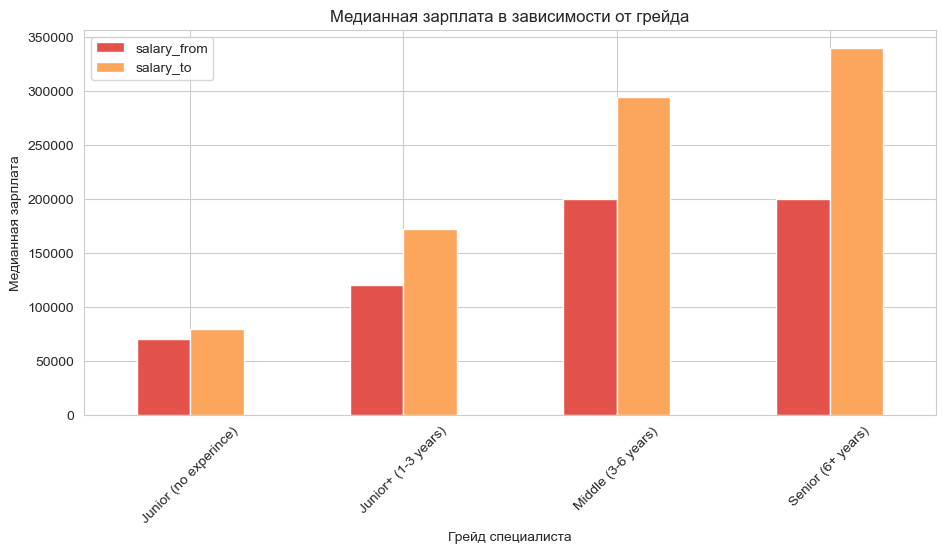

In [58]:
# визуализируем полученные данные 
df_sa_salary_all.plot(kind='bar', figsize=(11,5))
plt.title('Медианная зарплата в зависимости от грейда')
plt.xlabel('Грейд специалиста')
plt.ylabel('Медианная зарплата')
plt.xticks(rotation=45)
plt.show()

Ожидаемо с ростом опыта, растет и зарплата. 

In [59]:
# Добавим столбец с категорией города как в датасете с вакансиями для Аналитиков данных
df_sa['area_scope'] = np.where(df_sa['area'] == 'Москва', 'Москва',
                         np.where(df_sa['area'] == 'Санкт-Петербург', 'Санкт-Петербург', 'Другой город'))

In [60]:
df_sa_salary = (
    df_sa.pivot_table(index='experience', values=['salary_from', 'salary_to'], columns='area_scope', aggfunc='median')
         .sort_index(axis='columns', level='area_scope')
)
df_sa_salary

,salary_from,salary_to,salary_from,salary_to,salary_from,salary_to
area_scope,Другой город,Другой город,Москва,Москва,Санкт-Петербург,Санкт-Петербург
experience,,,,,,
Junior (no experince),50600.0,80000.0,70000.0,80000.0,70000.0,105000.0
Junior+ (1-3 years),90000.0,150000.0,150000.0,200000.0,150000.0,180000.0
Middle (3-6 years),140000.0,195000.0,240000.0,300000.0,200000.0,280000.0
Senior (6+ years),200000.0,NaN,190000.0,340000.0,350000.0,435000.0


В Москве в среднем зарплаты выше чем в Питере, а в Питере выше чем в регионах. Исключение вакансии для Junior и Senior специалистов, но для этих грейдов слишком мало вакансий тем более с разбивкой по городам для сбора статистики и выводов. 

**Выводы:** 
* чем выше грейд специалиста, тем выше зарплата;
* зарплаты в регионах в среднем ниже чем в Москве и Санкт-Петербурге;
* чем выше грейд, тем больше вилка зарплат.

***Сравнение зарплат по двум вакансиям:***
* у Системных Аналитиков в среднем выше зарплаты и если для специалистов без опыта эти отличия практически незаметны, то с ростом грейда разница особенно на верхней границе становистся значительной;
* Вакансии для грейда Senior есть не только в Москве.

#### 4.3 Исследование типа занятости

##### Типы занятости для Аналитика данных

In [61]:
df_da_employment = df_da.pivot_table(index='experience',  columns='employment', values='id', aggfunc='count')
df_da_employment

employment,Полная занятость,Проектная работа,Стажировка,Частичная занятость
experience,,,,
Junior (no experince),123.0,1.0,15.0,3.0
Junior+ (1-3 years),1077.0,3.0,1.0,8.0
Middle (3-6 years),546.0,1.0,NaN,5.0
Senior (6+ years),13.0,NaN,NaN,NaN


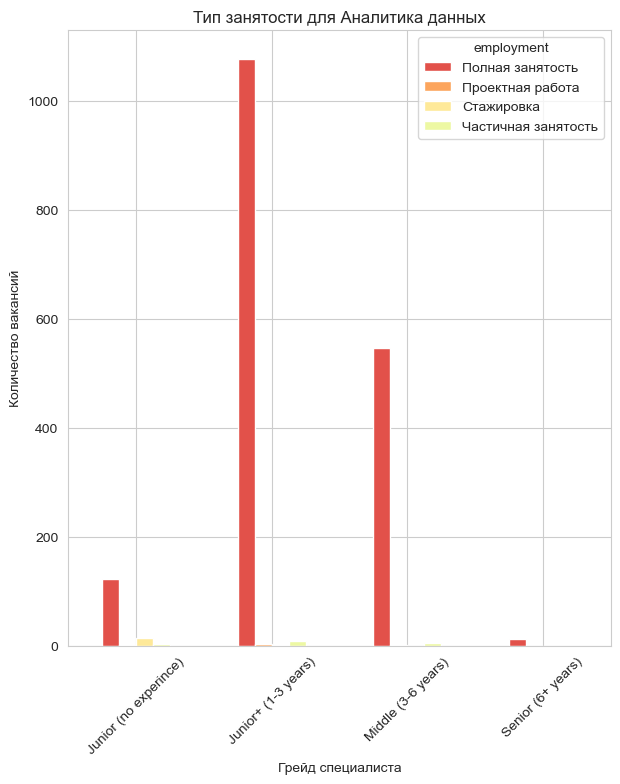

In [62]:
df_da_employment.plot(kind='bar', figsize=(7,8))
plt.title('Тип занятости для Аналитика данных')
plt.xlabel('Грейд специалиста')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

Чаще всего Аналитиков данных ищут на полную занятость кроме единичных вакансий. Исключение - стажировка для специалистов без опыта, которая составляет 12% всех вакансий. Senior аналитиков ищут только на полную занятость.

##### Типы занятости для Системного аналитика

In [63]:
df_sa_employment = df_sa.pivot_table(index='experience',  columns='employment', values='id', aggfunc='count')
df_sa_employment

employment,Полная занятость,Проектная работа,Стажировка,Частичная занятость
experience,,,,
Junior (no experince),56.0,NaN,29.0,1.0
Junior+ (1-3 years),851.0,1.0,NaN,NaN
Middle (3-6 years),926.0,2.0,NaN,5.0
Senior (6+ years),44.0,NaN,NaN,NaN


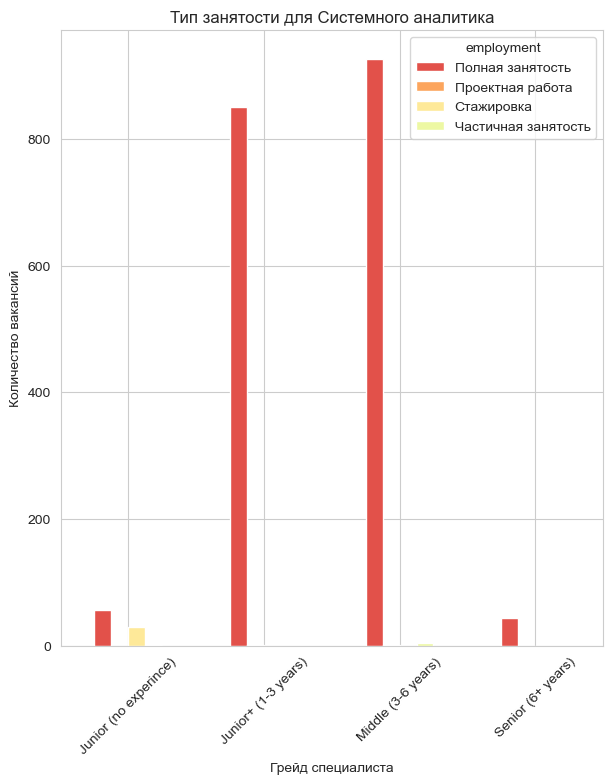

In [64]:
df_sa_employment.plot(kind='bar', figsize=(7,8))
plt.title('Тип занятости для Системного аналитика')
plt.xlabel('Грейд специалиста')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

Как и у Аналитиков данных, Системных аналитиков ищут в основном на полную занятость. Основное отличие в том, что тут уже более половины вакансий для специалистов без опыта это стажировка.

#### 4.4 Исследование графика работы

##### График работы для Аналитика данных

In [65]:
# рассчитаем количество вакансий для каждого греда по графику работы:
df_da_schedule = df_da.pivot_table(index='experience',  columns='schedule', values='id', aggfunc='count')
df_da_schedule

schedule,Гибкий график,Полный день,Сменный график,Удаленная работа
experience,,,,
Junior (no experince),3.0,122.0,2.0,15.0
Junior+ (1-3 years),21.0,904.0,7.0,157.0
Middle (3-6 years),17.0,403.0,NaN,132.0
Senior (6+ years),NaN,8.0,NaN,5.0


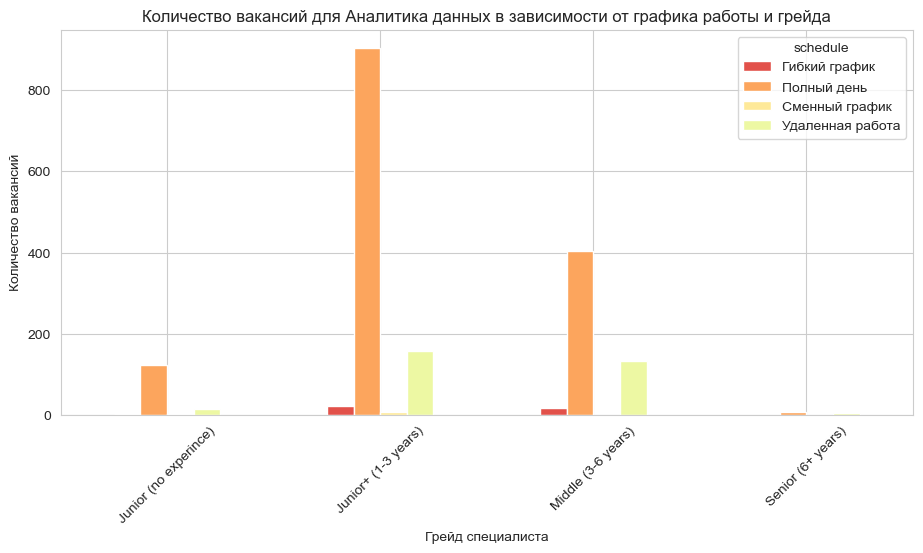

In [101]:
# для наглядности отобразим данные в виде диаграммы
df_da_schedule.plot(kind='bar', figsize=(11,5))
plt.title('Количество вакансий для Аналитика данных в зависимости от графика работы и грейда')
plt.xlabel('Грейд специалиста')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

* большинство вакансий рассчитано на полный рабочий день
* второй по популярности вариант - удаленка - чем больше опыт специалиста, тем больше доля вакансий с таким графиком работы
* гибкий график работы занимает маленькую долю от всех вакансий, но Middle специалистам в процентном отношении его предлагают чаще чем Junior
* 9 вакансий со сменным графиком и все они для специалистов с небольшим опытом

##### График работы для Системного аналитика

In [102]:
# рассчитаем количество вакансий для каждого греда по графику работы:
df_sa_schedule = df_sa.pivot_table(index='experience',  columns='schedule', values='id', aggfunc='count')
df_sa_schedule

schedule,Гибкий график,Полный день,Сменный график,Удаленная работа
experience,,,,
Junior (no experince),6.0,51.0,NaN,29.0
Junior+ (1-3 years),36.0,553.0,NaN,263.0
Middle (3-6 years),17.0,574.0,1.0,341.0
Senior (6+ years),2.0,25.0,NaN,17.0


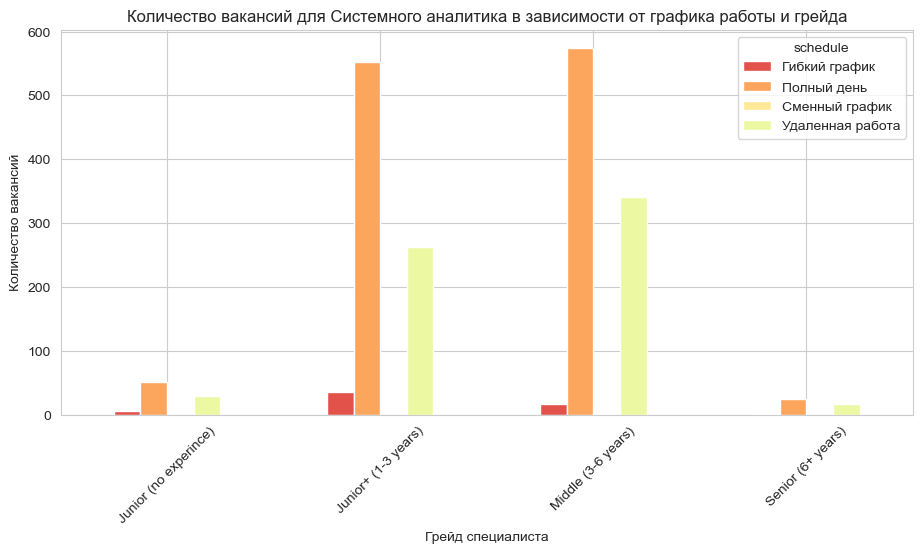

In [103]:
# для наглядности отобразим данные в виде диаграммы
df_sa_schedule.plot(kind='bar', figsize=(11,5))
plt.title('Количество вакансий для Системного аналитика в зависимости от графика работы и грейда')
plt.xlabel('Грейд специалиста')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

* большинство вакансий рассчитано на полный рабочий день
* второй по популярности тип занятости - удаленка. Но в отличие от вакансий "Аналитик данных" здесь вакансии на удаленную работу встречаются чаще, в том числе у специалистов без опыта
* также чаще встречается гибкий график у специалистов с небольшим опытом или без него
* сменный график встречается всего в одной вакансии у Middle специалиста и можно считать что это не характерный график для Системных аналитиков

### 5. Анализ  hard-skils и soft-skils

#### 5.1 Анализ hard-skils и soft-skils для Аналитика данных

Для начала проанализируем непосредственно колонки hard-skills и soft-skills

In [69]:
df_da.groupby(by='experience')['hard_skills_from_description'].value_counts()

experience             hard_skills_from_description
Junior (no experince)  Pandas                           19
                       confluence                        3
                       Юнит-экономика                    1
Junior+ (1-3 years)    Pandas                          151
                       confluence                       47
                       Pandas, confluence               21
                       Юнит-экономика                   15
                       Pandas, Юнит-экономика            4
                       Google Sheets                     2
                       Математическая статистика         1
Middle (3-6 years)     Pandas                           92
                       confluence                       35
                       Юнит-экономика                    9
                       Pandas, confluence                6
                       Pandas, Google Sheets             1
Senior (6+ years)      Pandas, confluence                3
    

Для специалистов всех грейдов требуется знание Pandas, confluence и юнит-экономики.

In [70]:
# выведем soft-skills которые встречаются хотя бы три раза
df_da.groupby(by='experience')['soft_skills_from_description'].value_counts().loc[lambda x: x>2]

experience             soft_skills_from_description                      
Junior (no experince)  Документация                                           12
                       Коммуникация                                           11
                       Аналитическое мышление                                  9
                       Проактивность                                           4
Junior+ (1-3 years)    Документация                                          111
                       Аналитическое мышление                                 89
                       Коммуникация                                           65
                       Коммуникация, Документация                             21
                       Проактивность                                          16
                       Документация, Аналитическое мышление                    8
                       Коммуникация, Проактивность                             6
                       Коммуникация

Для специалистов всех грейдов важно умение работать с документацией, коммуникация, аналитическое мышление и проактивность.
Встречаются еще такие навыки как креативность или адаптивность, но это единичные вакансии.

Знание pandas для всех грейдов встречается чаще остальных требований в том числе мягких, а значит можно сделать вывод что это один из самых важных навыков для Аналитика данных. В целом порядок цифр в мягкиях и твердых навыках примерно одинаковый, значит для Аналитика данных одинаково важно развивать hard-skils и soft-skils.

В столбцах hard-skills и soft-skills оказалось не так много данных. По ним можно понять несколько основных навыков, обязательных для работы Аналитиком данных, но это далеко не все требуемые навыки. А также по анализу этих столбцов не видно разницу в требованиях в зависимости от грейда. Поэтому продолжим анализ на основе колонки key-skills

In [71]:
print(df_da['key_skills'].head(15))

0                         [Power BI, СУБД, Python, SQL]
1            [MS SQL, Работа с базами данных, MS Excel]
2       [SQL, Power BI, СУБД, Python, Clickhouse, BPMN]
3     [Анализ данных, Коммуникация, SQL, MS Office, ...
4                                        [Документация]
5              [Python, SQL, Математическая статистика]
6                                                    []
7           [Документация, Проактивность, Коммуникация]
8                                                    []
9                              [Аналитическое мышление]
10                                             [Pandas]
11    [Linux, SQL, Бизнес-анализ, Hadoop, Big Data, ...
12    [Linux, SQL, поведение пользователей, Data Sci...
13    [Анализ данных, Проактивность, SQL, Python, Ai...
14                                                   []
Name: key_skills, dtype: object


In [72]:
# уберем из таблицы записи где нет данных о ключевых навыках
daf_da_with_key_skills = df_da[df_da['key_skills'].map(lambda x: x != [''])]

In [73]:
# посчитаем количество упоминаний каждого навыка
df_da_skills = daf_da_with_key_skills.query('experience=="Junior (no experince)"')['key_skills'].explode('key_skills').value_counts()

In [74]:
# топ-20 навыков для грейда Junior
df_skills_junior = df_da_skills.head(20)
df_skills_junior

key_skills
Аналитическое мышление                 40
SQL                                    37
Python                                 34
Анализ данных                          31
MS Excel                               28
Работа с большим объемом информации    19
Pandas                                 19
Документация                           17
Коммуникация                           17
Базы данных                            12
Работа с базами данных                 11
Аналитика                              11
Сбор и анализ информации                8
Аналитические исследования              8
MS PowerPoint                           8
Power BI                                7
Проактивность                           6
Работа в команде                        6
Статистический анализ                   5
Математическая статистика               5
Name: count, dtype: int64

In [106]:
# чтобы избежать многократного дублирования кода, напишем функцию которая визуализирует данную информацию в виде облака слов
def draw_cloud(word_series):
    # конвертируем series в словарь
    word_dict = word_series.to_dict()

    # рисуем облако
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

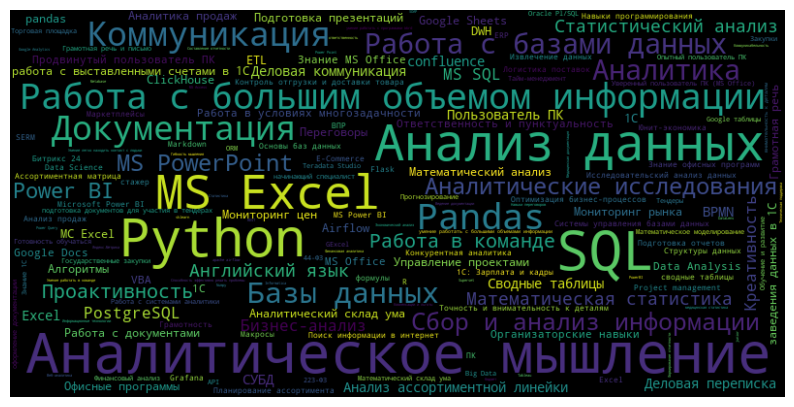

In [107]:
draw_cloud(df_da_skills)

К основным hard-skills для специалиста без опыта можно отнести:
* SQL
* Python
* Анализ данных
* MS Excel
* Pandas
* Базы данных

Желательные soft-skills:
* Аналитическое мышление
* Работа с большим объемом информации
* Коммуникация
* Документация

In [77]:
# посчитаем количество упоминаний каждого навыка
df_da_skills_junior_plus = daf_da_with_key_skills.query('experience=="Junior+ (1-3 years)"')['key_skills'].explode('key_skills').value_counts()

In [78]:
# топ-20 навыков для грейда Junior+
df_skills_junior_plus = df_da_skills_junior_plus.head(20)
df_skills_junior_plus

key_skills
SQL                                    468
Python                                 321
Анализ данных                          262
Аналитическое мышление                 241
Pandas                                 177
Документация                           149
MS Excel                               140
Power BI                               139
Работа с базами данных                 121
Работа с большим объемом информации    119
Аналитика                              114
Коммуникация                           105
MS SQL                                  74
Базы данных                             71
confluence                              68
Математическая статистика               66
Сбор и анализ информации                64
Data Analysis                           64
Аналитические исследования              57
Tableau                                 52
Name: count, dtype: int64

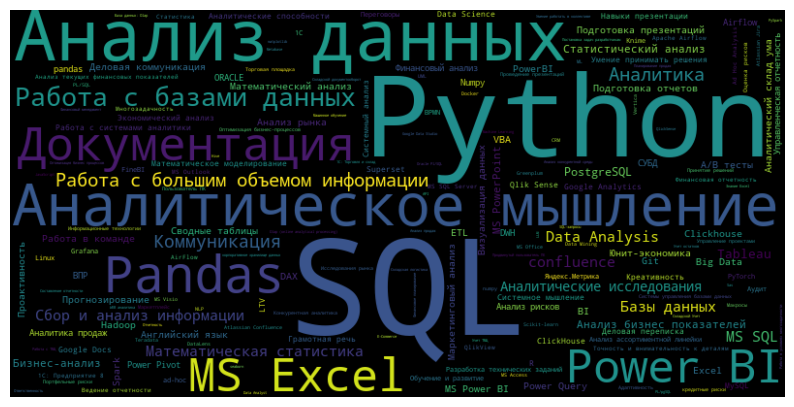

In [79]:
# рисуем облако
draw_cloud(df_da_skills_junior_plus)

К основным hard-skills для специалиста Junior+ можно отнести:
* SQL
* Python
* Анализ данных
* Pandas
* MS Excel
* Power BI 
* MS SQL                                  
* confluence

Желательные soft-skills:
* Документация
* Аналитическое мышление
* Работа с большим объемом информации
* Коммуникация

In [80]:
# посчитаем количество упоминаний каждого навыка
df_da_skills_middle = daf_da_with_key_skills.query('experience=="Middle (3-6 years)"')['key_skills'].explode('key_skills').value_counts()

In [81]:
df_skills_middle = df_da_skills_middle.head(20)
df_skills_middle

key_skills
SQL                                    249
Python                                 216
Анализ данных                          114
Документация                           106
Pandas                                 104
Аналитическое мышление                  82
Power BI                                72
Data Analysis                           61
Коммуникация                            56
Работа с базами данных                  53
Аналитика                               49
Работа с большим объемом информации     45
MS SQL                                  45
Базы данных                             44
confluence                              41
MS Excel                                39
Математическая статистика               37
Tableau                                 35
PostgreSQL                              35
A/B тесты                               34
Name: count, dtype: int64

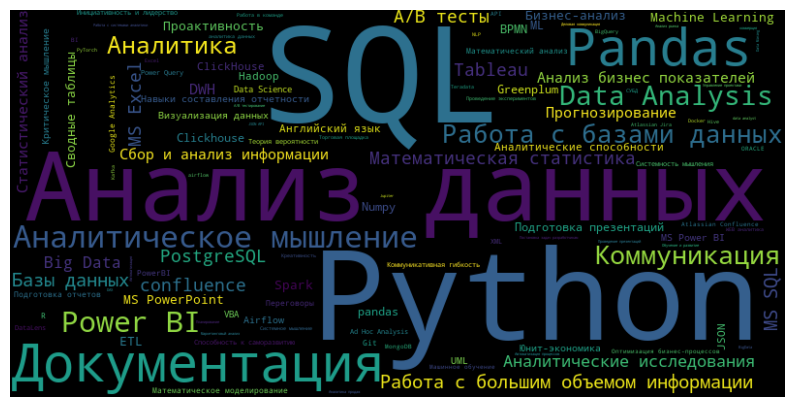

In [82]:
# рисуем облако
draw_cloud(df_da_skills_middle)

К основным hard-skills для специалиста Middle можно отнести:
* SQL
* Python
* Анализ данных
* Pandas
* Power BI 
* MS SQL                                  
* confluence

Желательные soft-skills:
* Документация
* Аналитическое мышление
* Работа с большим объемом информации
* Коммуникация

In [83]:
# посчитаем количество упоминаний каждого навыка
df_da_skills_senior = daf_da_with_key_skills.query('experience=="Senior (6+ years)"')['key_skills'].explode('key_skills').value_counts()

In [84]:
df_skills_senior = df_da_skills_senior.head(20)
df_skills_senior

key_skills
Python                        9
SQL                           9
Документация                  4
Power BI                      4
confluence                    4
Pandas                        4
A/B тесты                     3
Data Analysis                 3
Юнит-экономика                3
Проактивность                 3
Презентация результатов       3
Английский язык               3
Аналитические исследования    3
Tableau                       3
Коммуникация                  3
Analysis                      2
Аналитическое мышление        2
EDA                           2
Статистический анализ         2
Внимание к деталям            2
Name: count, dtype: int64

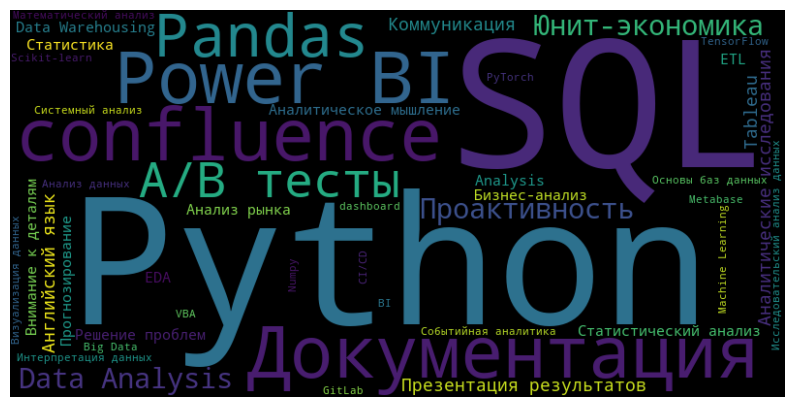

In [85]:
# рисуем облако
draw_cloud(df_da_skills_senior)

К основным hard-skills для специалиста Senior можно отнести:
* SQL
* Python
* Pandas
* Power BI
* A/B тесты
* Английский язык                               
* Tableau

Желательные soft-skills:
* Документация
* Проактивность
* Коммуникация

#### 5.2 Анализ hard-skils и soft-skils для Системного аналитика

Для начала проанализируем непосредственно колонки hard-skills и soft-skills

In [86]:
df_sa.groupby(by='experience')['hard_skills_from_description'].value_counts()

experience             hard_skills_from_description
Junior (no experince)  confluence                       10
Junior+ (1-3 years)    confluence                      231
                       Юнит-экономика                    4
                       Pandas                            2
                       confluence, Юнит-экономика        2
Middle (3-6 years)     confluence                      296
                       confluence, Юнит-экономика        6
                       Юнит-экономика                    5
                       Pandas                            1
Senior (6+ years)      confluence                       10
                       Юнит-экономика                    2
                       confluence, Юнит-экономика        1
Name: count, dtype: int64

In [87]:
# выведем soft-skills которые встречаются хотя бы три раза
df_sa.groupby(by='experience')['soft_skills_from_description'].value_counts().loc[lambda x: x>2]

experience             soft_skills_from_description                      
Junior (no experince)  Документация                                           28
                       Документация, Аналитическое мышление                   16
                       Коммуникация, Документация, Аналитическое мышление      3
                       Коммуникация                                            3
Junior+ (1-3 years)    Документация                                          405
                       Коммуникация, Документация                             78
                       Документация, Аналитическое мышление                   38
                       Коммуникация                                           33
                       Аналитическое мышление                                 23
                       Документация, Проактивность                             9
                       Проактивность, Аналитическое мышление                   8
                       Документация

Из твердых навыков у специалистов Junior в требованиях только confluence. Остальным требуется также юнит-экономика и pandas. Из мягких - документация, аналитическое мышление и коммуникация. Но в отличие от вакансий Аналитика данных, у Системных аналитиков намного чаще встречаются требования к мягким навыкам, чем к твердым.

In [88]:
# уберем из таблицы записи где нет данных о ключевых навыках
daf_sa_with_key_skills = df_sa[df_sa['key_skills'].map(lambda x: x != [''])]

In [89]:
# посчитаем количество упоминаний каждого навыка
df_sa_skills_junior =  daf_sa_with_key_skills.query('experience=="Junior (no experince)"')['key_skills'].explode('key_skills').value_counts()

In [90]:
# топ-20 навыков для грейда Junior
df_skills_junior_sa = df_sa_skills_junior.head(20)
df_skills_junior_sa

key_skills
Документация                      50
Аналитическое мышление            46
SQL                               34
Системный анализ                  27
Бизнес-анализ                     22
UML                               21
BPMN                              21
Работа с базами данных            20
Python                            18
Аналитический склад ума           18
REST                              18
JSON API                          17
Разработка ПО                     16
System Analysis                   16
Анализ данных                     14
Техническая документация          12
Постановка задач разработчикам    12
Анализ требований                 11
Разработка технических заданий    10
confluence                        10
Name: count, dtype: int64

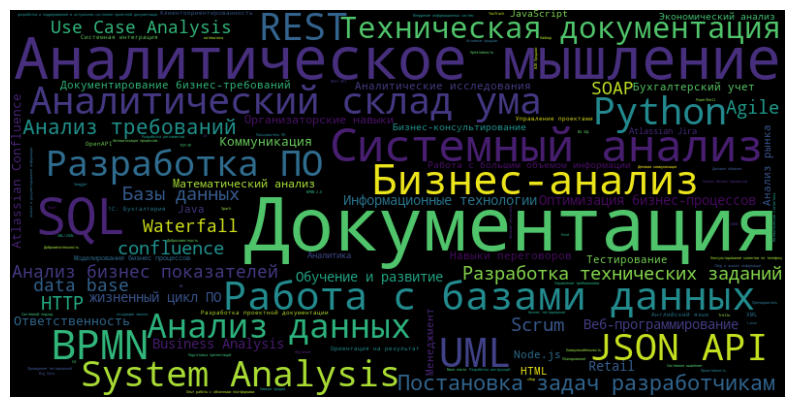

In [91]:
# рисуем облако
draw_cloud(df_sa_skills_junior)

К основным hard-skills для специалиста Junior можно отнести:
* SQL
* Системный анализ
* Бизнес-анализ
* UML
* BPMN
* Работа с базами данных
* Python
* REST
* JSON API   

Желательные soft-skills:
* Документация
* Аналитическое мышление и Аналитический склад ума

Несмотря на то что мягкие навыки указывают чаще, системному аналитику для успешного трудоустройства желательно обладать большим количеством разнообразных hard-shills.

In [92]:
# посчитаем количество упоминаний каждого навыка
df_sa_skills_junior_plus = daf_sa_with_key_skills.query('experience=="Junior+ (1-3 years)"')['key_skills'].explode('key_skills').value_counts()

In [93]:
# топ-20 навыков для грейда Junior+
df_skills_junior_plus_sa = df_sa_skills_junior_plus.head(20)
df_skills_junior_plus_sa

key_skills
Документация                      554
BPMN                              280
SQL                               276
UML                               237
confluence                        233
Системный анализ                  223
Аналитическое мышление            158
REST                              145
Разработка технических заданий    130
Коммуникация                      127
Постановка задач разработчикам    104
SOAP                              100
XML                                94
Бизнес-анализ                      82
Atlassian Jira                     74
API                                72
JSON                               68
Atlassian Confluence               59
Моделирование бизнес процессов     58
MS SQL                             47
Name: count, dtype: int64

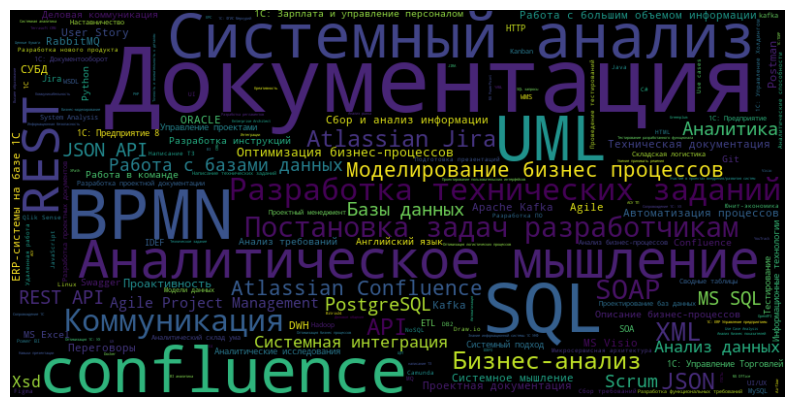

In [94]:
# рисуем облако
draw_cloud(df_sa_skills_junior_plus)

К основным hard-skills для специалиста Junior+ можно отнести:
* BPMN
* SQL
* UML
* BPMN
* confluence
* Системный анализ
* REST
* Разработка технических заданий
* SOAP  

Желательные soft-skills:
* Документация
* Аналитическое мышление
* Коммуникация

У специалиста Junior+ список требований похож на список у Junior, но из твердых навыков им уже чаще стоит уметь писать техзадания, а из мягких обладать навыками коммуникации для взаимодействия с заказчиком, так как с опытом появляется больше самостоятельности.

In [95]:
# посчитаем количество упоминаний каждого навыка
df_sa_skills_middle = daf_sa_with_key_skills.query('experience=="Middle (3-6 years)"')['key_skills'].explode('key_skills').value_counts()

In [96]:
df_skills_middle_sa = df_sa_skills_middle.head(20)
df_skills_middle_sa

key_skills
Документация                      658
SQL                               343
BPMN                              317
confluence                        302
Системный анализ                  298
UML                               286
REST                              214
SOAP                              148
Коммуникация                      138
XML                               103
API                               102
Разработка технических заданий     99
Постановка задач разработчикам     89
Аналитическое мышление             87
JSON                               67
Atlassian Jira                     64
Бизнес-анализ                      62
Atlassian Confluence               56
Kafka                              50
JSON API                           48
Name: count, dtype: int64

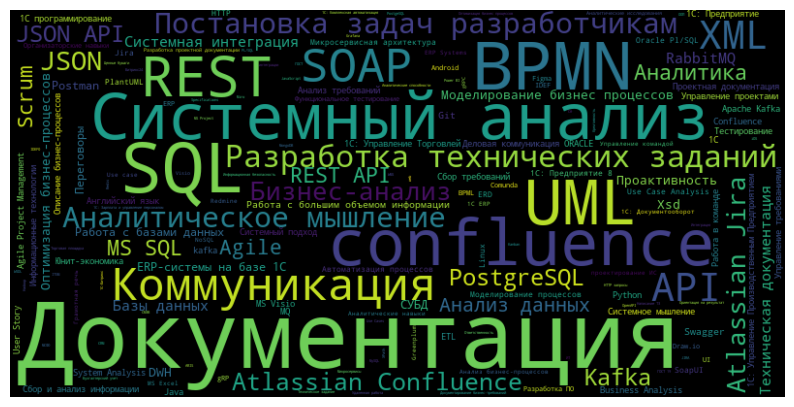

In [97]:
# рисуем облако
draw_cloud(df_sa_skills_middle)

К основным hard-skills для специалиста Middle можно отнести:
* SQL
* BPMN
* confluence
* Системный анализ
* UML
* REST
* SOAP
* XML
* API
* Разработка технических заданий 

Желательные soft-skills:
* Документация
* Коммуникация

Для специалиста Middle все также важны документация и коммуникации из мягких навыков, а количество и разнообразие твердых продолжает расти относительно предыдущего грейда.

In [98]:
# посчитаем количество упоминаний каждого навыка
df_sa_skills_senior = daf_sa_with_key_skills.query('experience=="Senior (6+ years)"')['key_skills'].explode('key_skills').value_counts()

In [99]:
df_skills_senior_sa = df_sa_skills_senior.head(20)
df_skills_senior_sa

key_skills
Документация                      29
SQL                               20
BPMN                              17
UML                               17
Системный анализ                  16
REST                              14
confluence                        11
Atlassian Jira                     8
SOAP                               8
API                                8
XML                                7
Коммуникация                       7
Python                             7
Разработка технических заданий     6
Atlassian Confluence               6
JSON                               6
JSON API                           5
Kafka                              5
Постановка задач разработчикам     5
Системная интеграция               4
Name: count, dtype: int64

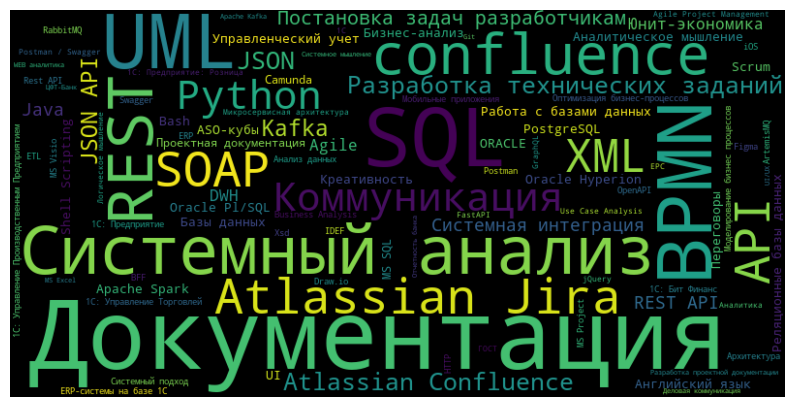

In [100]:
# рисуем облако
draw_cloud(df_sa_skills_senior)

К основным hard-skills для специалиста Senior можно отнести:
* SQL
* BPMN
* UML
* Системный анализ
* REST
* confluence
* Atlassian Jira
* SOAP
* API
* XML
* Python

Желательные soft-skills:
* Документация
* Коммуникация

Для специалиста Senior набор навыков примерно аналогичен навыкам для Middle. Но по частоте упоминаний выерх в таблице поднимается Atlassian Jira для управления проектом, планирования и отслеживания работы команды.

#### Общие выводы по навыкам для Аналитика данных и Системного аналитика

Для аналитика данных для всех грейдов необходимо знание: 
* Pandas,
* Piton,
* confluence
* и Юнит-экономики.

А также они должны обладать такими мягкими навыками как:
* Документация,
* Аналитическое мышление,
* Работа с большим объемом информации,
* Коммуникация.

С ростом грейда множество навыков не сильно меняется, например с уровня Middle появляются A/B тесты или EDA и Английский язык у Senior.

У системных аналитиков всех грейдов на первом месте документация, кроме того из soft-skills с грейда Junior+ важным навыком является коммуникации. Hard-skills наиболее важные для всех грейдов это:
* SQL
* Системный анализ
* Бизнес-анализ
* UML
* BPMN
* confluence
В зависимости от грейда эти требования меняются местами по частоте упоминания в вакансиях но всегда находятся вверху списка. Кроме них добавляются чуть более редкие но все равно популярные требования (REST, JSON Api, Jira, A/B тесты и тд).

Основное отличие Системных аналитиков от Аналитиков данных - это бОльшее число требуемых твердых навыков. Они встречаются реже основных, но для того чтобы стать конкурентоспособным специалистом на рынке, ими тоже желательно обладать. 

### Общие выводы по исследованию

По опыту работы:
* Аналитиков данных чаще ищут среди специалистов с небольшим опытом (1-3 года), в то время как для от Системного аналитика работодатели чаще ждут больший опыт работы;* 
начинающему специалисту без опыта проще найти работу Аналитиком данны.

По работодателям:
* основная доля вакансий для Аналитиков данных от СБЕРа;
* работодатели Аналитика данных из самых разных отраслей и сфер деятельности, но с ростом грейда растет количество АйТи-компаний;
* у системных аналитиков тоже СБЕР основной работодатель, но в отличие от Аналитиков данных, Системных аналитиков он ждет хотя бы с минимальным опытом работы;
* среди ТОП работодателей для Системного аналитика большинство это АйТи компании.

По уровню зарплаты:
* чем выше грейд, тем выше медианная зарплата специалиста;* 
в среднем зарплаты выше у Системных аналитико;в* 
вилка зарплат начиная с грейда Junior+ больше у Системного аналитика, а значит больше возможностей для рос.

По типу занятости:
* большинство вакансий рассчитано на полную занятость;* 
Системным аналитикам чаще предлагаетсястажировка в начале карьеры.

По графику работы:
* большинство работодателей ищут сотрудников любого грейда преимущественно на полный рабочий день;* 
Системным аналитикам чаще предлагается удаленк;а* 
гибкий график работы также чаще готовы предложить Системным аналитик.

По требуемым навыкам:
* для аналитика данных для всех грейдов необходимо знание Pandas, Piton, confluence и Юнит-экономики из твердых навыков и они должны обладать такими мягкими навыками как документация, коммуникации, аналитическое мышление;
* с ростом грейда от Junior+ до Senior множество навыков меняется незначительно, в основном добавляются hard-skills, например с уровня Middle появляются A/B тесты или EDA и Английский язык у Senior;
* у системных аналитиков всех грейдов на первом месте документация, кроме того из soft-skills с грейда Junior+ важным навыком является коммуникации;
* важные для Системного аналитика твердые навыки - это SQL, Системный анализ, Бизнес-анализ, UML, BPMN, confluence;
* с ростом грейда добавляются требования знания более узко специализированных программ, а также программ для управления проектом, например Atlassian Jira;
* Системным аналитикам это нужно обладать бОльшим количеством твердых навыков. Они встречаются в вакансиях несколько реже основных, но для того чтобы стать конкурентоспособным специалистом на рынке, все это специалисту тоже желательно изучить.а
а
та



Ссылка на презентацию - https://disk.yandex.ru/i/iSk4vt_dY6UKdg